# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement based on the Ridge regression example, the Lasso regression.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Lasso
print("DONE")

DONE


## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

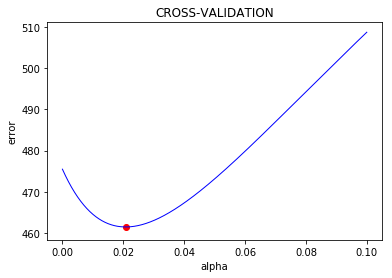

I picked 1000 alphas from within (0,0.1).
Alpha which leads to the lowest cost is 0.020821

DONE


In [119]:
#I implemented LEAVE ONE OUT algorithm
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha_list = np.linspace(start = 0.0, stop = 0.1, num = 1000)# change here
costlist=[]
sorted_cost=[]

# add 1-3 line of code here

for alpha in alpha_list:
    error=0
    for k in range(y.shape[0]):
        xk=x
        yk=y
        xk=np.delete(xk, k, axis=0)
        yk=np.delete(yk, k, axis=0)
        wk = np.linalg.inv(xk.T@xk + alpha * I)@xk.T@yk
        wk=wk.ravel()
        error+=((y-x@wk.T)[k]*(y-x@wk.T)[k])/(y.shape[0])#+alpha*wk*wk.T)/(y.shape[0]) #czy tu powinno być cost=RSS+alpha*w*w.T?
    
    costlist.append(error[0,0])

min_index = costlist.index(min(costlist))   
    
fig = plt.figure()
plt.plot(alpha_list, costlist, color='blue', linewidth = 1)
plt.scatter(alpha_list[min_index],costlist[min_index], color='red')
plt.title('CROSS-VALIDATION')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

# add 1-3 lines to compare the results
print("I picked 1000 alphas from within (0,0.1).")
print("Alpha which leads to the lowest cost is {0:.6f}".format(alpha_list[min_index]))

print("\nDONE")

## 2. Implement based on the Ridge regression example, the Lasso regression.

You only need to update the compare the results with the sklearn results. You should get
[1.61776499, -180.8579086].

In [117]:
#Since there is no closed form solution for lasso regression
#I implemented coordinate descent algorithm for lasso.

def soft_threshold(rho,lamda,n_j):
    if rho < - lamda/2:
        return (rho + lamda/2)/(n_j*n_j)
    elif rho >  lamda:
        return (rho - lamda/2)/(n_j*n_j)
    else: 
        return 0
    

def coordinate_descent_lasso_reg(norm, coef, x, y, lamda, max_iterations):
   
    m,n = x.shape
    
    #Loop until max number of iterations max_iterations=1000
    for i in range(max_iterations): 
        
        #Looping through each coordinate x.shape[1]
        for j in range(n):

            n_j=norm[j]
            x_j = x[:,j].reshape(-1,1)
            y_pred = x @ coef 
            rho = x_j.T @ (y - y_pred  + x_j*coef[j])
        
            if j == 0: 
                coef[j] =  rho/(n_j*n_j)
            else:
                coef[j] =  soft_threshold(rho, lamda, n_j)  

            
    return coef
print("DONE")

DONE


In [118]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

alpha = 0.1

#Lasso regression using sklearn
lasso_regression = Lasso(alpha=alpha)
lasso_regression.fit(X=x, y=y)

wlasso=[lasso_regression.coef_[0], lasso_regression.intercept_[0]]
print("Lasso regression using sklearn: ",wlasso)


x = np.asmatrix(np.c_[np.ones((x.shape[0],1)),x])
n = x.shape[1]

norm = (np.linalg.norm(x,axis = 0))

initial_coef = np.zeros((n,1))

w1,w2 = coordinate_descent_lasso_reg(norm, initial_coef, x, y, lamda = alpha, max_iterations=1000)
w=[w2[0],w1[0]]
print("Lasso regression using numpy and coordinate descent: ",w)
print("DONE")

Lasso regression using sklearn:  [1.6177649901016677, -180.85790859980537]
Lasso regression using numpy and coordinate descent:  [1.6178319943029593, -180.86919266246446]
DONE


## 3. Extend the Fisher's classifier

Please extend the targets of ``iris_data`` variable and use it as $y$.

I wasn t sure how to solve this problem. First I extended feature space to 4 features. Next I calculated 
Covariance matrixes of distances from class centers. I added them which enabled me to
find within class scatter matrix sw. Wrom differences between means of each class and overall mean
I was able to calculate between class scatter matrix. Finally, I defined cuts as average of two means
(pair of two classes) and proceded with classification which yield fantastic result of 89% accuracy.
I based my code on information which I found on this blog:

https://www.apsl.net/blog/2017/07/18/using-linear-discriminant-analysis-lda-data-explore-step-step

original class labels :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

labels assigned to y_pred by Fisher classifier:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2.
 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2.
 2. 1. 1. 2. 2. 2.] 

Percentage of data correctly classified: 89.3333%


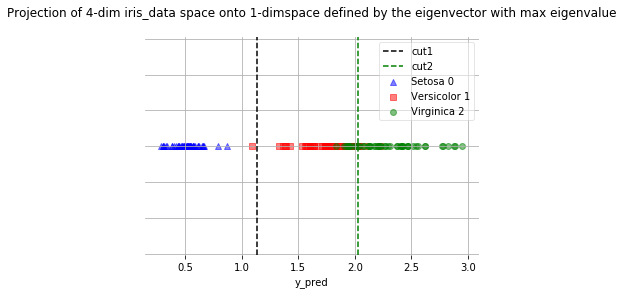

DONE


In [248]:
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

X=iris_df.values #Updated line
clas = iris_data.target #targets
mean=[]

#Calculate mean values of features for each class and overall_mean
for i in range(0,3):
    mean.append(np.mean(X[np.where(clas==i)],axis=0))
overall_mean = np.mean(X, axis=0)

#Calculate within class scatter matrix SW
for j in range(0,3):
    #calculation distance to class center
    distance_to_class_center=(X[np.where(clas==j)] - mean[j]).T
    #calculating covariance measure of scatter
    sigma=np.cov(distance_to_class_center)
    sw+=sigma #sw = sigma1 + sigma2 + sigma3 
    
#Calculate between class scatter matrix SB
for j in range(0,3):
    n = X[np.where(clas==j)].shape[0] #size of the respective class
    scatter=np.outer(mean[j] - overall_mean, mean[j] - overall_mean)
    sb+= n*scatter #sb = n0*sb0 + n1*sb1 + n2*sb2

eig = np.linalg.eig(np.linalg.inv(sw)@sb)

w1 = eig[1][0] #eigenvector for maximal eigenvalue

cut1 = 1/2*w1@(mean[0] + mean[1])
cut2 = 1/2*w1@(mean[1] + mean[2])

y_pred = X@w1
y=y_pred*0


for counter, y_pred_value in enumerate(y_pred):
    if y_pred_value < cut1:
        
         y[counter] = 0
            
    elif y_pred_value > cut2:
        
         y[counter] = 2
        
    else:
         y[counter] = 1


print("original class labels :\n", iris_data.target,"\n")
print("labels assigned to y_pred by Fisher classifier:\n",y,"\n")

print('Percentage of data correctly classified: {:.4%}'.format(np.mean(y == clas)))    

label_dict = {0: 'Setosa 0', 1: 'Versicolor 1', 2:'Virginica 2'}
ax = plt.subplot(111)
for label,marker,color in zip(
    range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

    plt.scatter(x=y_pred[np.where(clas==label)],
        y=list(np.zeros(y_pred[np.where(clas==label)].shape[0])),
        marker=marker,
        color=color,
        alpha=0.5,
        label=label_dict[label]
        )

plt.xlabel('y_pred')


plt.axvline(cut1, linestyle='--', color='k', label='cut1')
plt.axvline(cut2, linestyle='--', color='g', label='cut2')

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)

plt.title('Projection of 4-dim iris_data space onto 1-dim\
space defined by the eigenvector with max eigenvalue\n')

plt.tick_params(axis='both', which='both',\
                bottom='on', top='off', labelbottom='on', right='off', left='off', labelleft='off')


# remove axis spines
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    

plt.grid()
plt.tight_layout
plt.show()


print("DONE")